In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from random import choices
import mpl_scatter_density
import math 

In [2]:
path = '../trendanalysis_finegrain/'
path_miss = '../trendanalysis_finegrain/missing_data/'
path_fulltext = '../trendanalysis_finegrain/fulltext/'
files = [i for i in os.listdir(path) if 'edited' not in i and '.csv' in i]
analysis_predictions_df = pd.DataFrame()
for file in files:
    analysis_predictions_df = pd.concat([analysis_predictions_df, pd.read_csv(os.path.join(path, file), header=0)])
    analysis_predictions_df = pd.concat([analysis_predictions_df, pd.read_csv(os.path.join(path_miss, file), header=0).drop(['IF'], axis=1)])
    analysis_predictions_df = pd.concat([analysis_predictions_df, pd.read_csv(os.path.join(path_fulltext, file), header=0).drop(['IF'], axis=1)])
analysis_predictions_df.shape

/home/lanj3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/home/lanj3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/lanj3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and sil

(2999973, 10)

In [3]:
num_reported = []
for i, article in analysis_predictions_df.groupby('PMID'):
    num_reported.append(article[article['is_reported']=='Y'].shape[0])

In [3]:
meta = pd.read_csv('/efs/lanj3/UTRECHT/frrp.csv', header=0)
meta = meta.rename(columns={"pmid": "PMID"})[['PMID', 'IF']]
analysis_predictions_df = analysis_predictions_df.merge(meta, on='PMID')
analysis_predictions_df = analysis_predictions_df[~analysis_predictions_df['CONSORT_item'].isin(['3b', '6b'])]

/home/lanj3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
analysis_predictions_df = analysis_predictions_df[analysis_predictions_df['IF'].notna()]

In [13]:
len(analysis_predictions_df['PMID'].unique())

162704

In [5]:
num_reported = []
IF = []
for i, article in analysis_predictions_df.groupby('PMID'):
    if not np.isnan(article['IF'].unique()[0]):
        num_reported.append(article[article['is_reported']=='Y'].shape[0])
        IF.append(article['IF'].unique()[0])

In [16]:
from scipy.stats import pearsonr
print(pearsonr([i[0] for i in items_le_1996], [i[1] for i in items_le_1966]))
print(pearsonr([i[0] for i in items_la_1996], [i[1] for i in items_la_1996]))

(-0.20420393556432903, 5.008951828049901e-128)
(0.18046723891117844, 0.0)


In [13]:
items_le_1996 = []
items_la_1996 = []
for i, article in analysis_predictions_df.groupby('PMID'):
    if article['Year'].unique()[0] <= 1996:
        items_le_1966.append([article['IF'].unique()[0], article[article['is_reported']=='Y'].shape[0]])
    else:
        items_la_1966.append([article['IF'].unique()[0], article[article['is_reported']=='Y'].shape[0]])

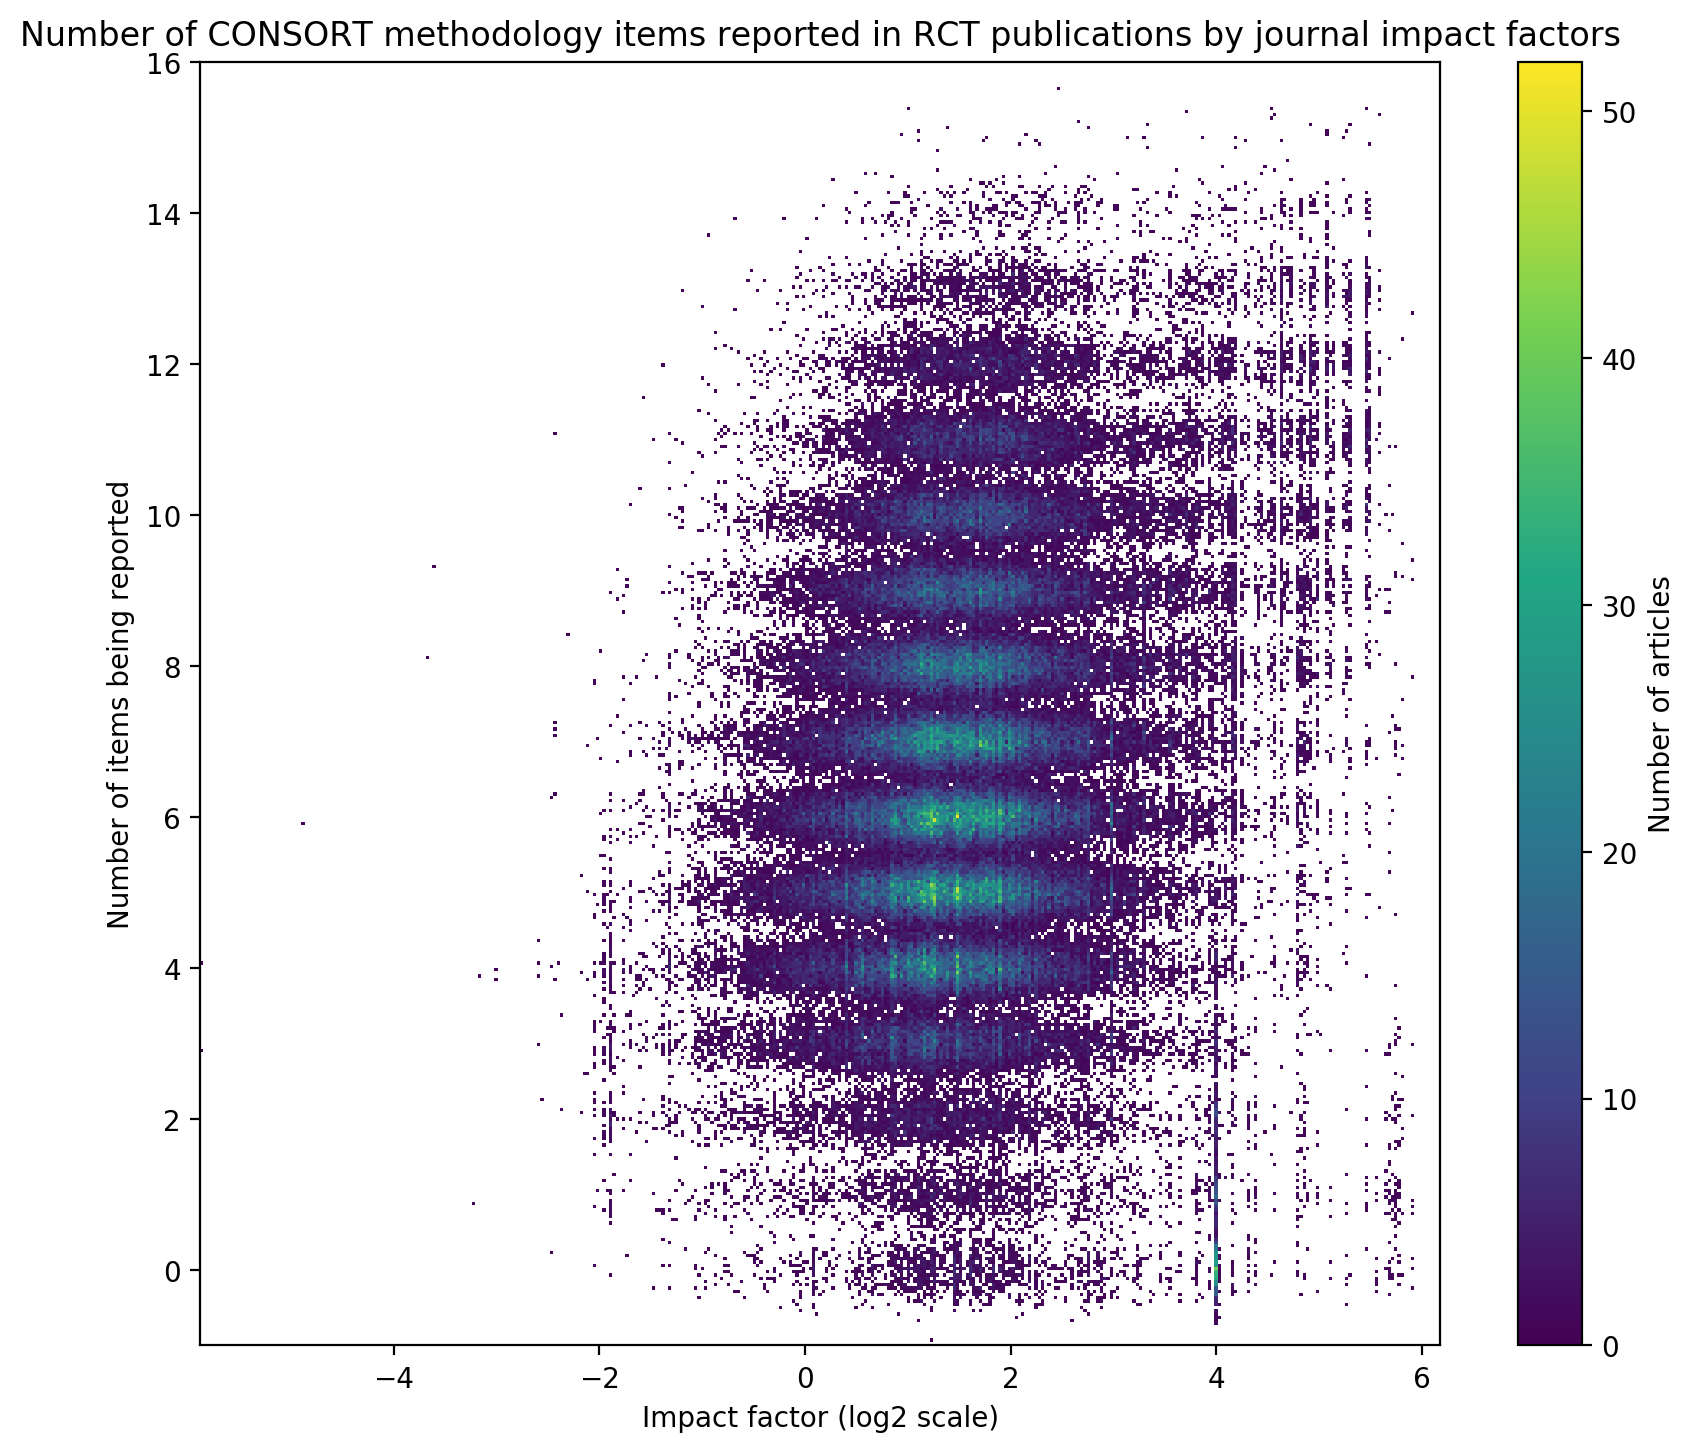

In [28]:
from matplotlib.colors import LinearSegmentedColormap

def rand_jitter(arr):
    stdev = .015 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-200, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=1000)

fig = plt.figure(figsize=(10, 8.5), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
# ax.scatter_density()
density = ax.scatter_density([math.log(r,2) for r in IF], rand_jitter(num_reported), cmap=white_viridis)
fig.colorbar(density, label='Number of articles')
# ax.set_xlim(-2, 10)
ax.set_ylim(-1, 16)
# ax.set_xscale('log',basex=2)
# ax.tick_params(which='both', width=2)
ax.set_xlabel('Impact factor (log2 scale)')
ax.set_ylabel('Number of items being reported')
plt.title('Number of CONSORT methodology items reported in RCT publications by journal impact factors')
fig.savefig("if_num.png", bbox_inches='tight')


In [61]:
import seaborn as sns

In [7]:
df = pd.DataFrame({'if':[math.log(r,2) for r in IF], 'n_items':num_reported})

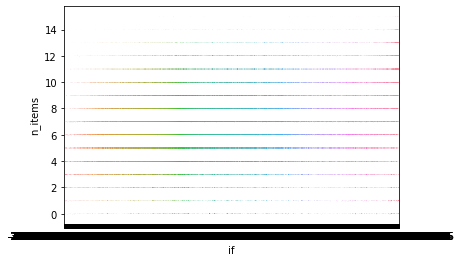

In [10]:
import seaborn as sns
sns.stripplot(data =df, x="if", y="n_items", jitter=True, size=.2)

In [12]:
from scipy.stats import pearsonr
pearsonr(num_reported, IF)

(0.1592061639535281, 0.0)

In [28]:
# year_analysis_le3 & year_analysis_la3
for years in year_analysis_le5:
    print(years, st.ttest_ind(year_analysis_le3[years], year_analysis_la3[years]))

0-1990 Ttest_indResult(statistic=9.582409040202275, pvalue=1.386572550475268e-21)
1990-1995 Ttest_indResult(statistic=5.176002134052814, pvalue=2.3416130714207202e-07)
1995-2000 Ttest_indResult(statistic=-18.17340670463534, pvalue=1.492347241079349e-72)
2000-2005 Ttest_indResult(statistic=-23.79663768748844, pvalue=1.2670347936732304e-123)
2005-2010 Ttest_indResult(statistic=-24.06423717853484, pvalue=5.6568593622553715e-127)
2010-2018 Ttest_indResult(statistic=-28.01336501484105, pvalue=7.134933916405774e-172)


In [15]:
analysis_predictions_df = analysis_predictions_df[~analysis_predictions_df['CONSORT_item'].isin(['3b', '6b'])]
analysis_predictions_df.shape

(2440560, 11)

In [30]:
output = []

In [59]:
year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
df_less3 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat10 == '>10']
print(len(df_less3.PMID.unique()))
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_less3[(df_less3["Year"] < int(year[1])) & (df_less3["Year"] >= int(year[0]))]
    print(len(data_df_per_YEAR.PMID.unique()))

11250
589
409
597
1448
2148
6059


In [29]:
df_less3 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat3 =='<=3']
print(len(df_less3.PMID.unique()))
# year_analysis_le3 = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
# for years in year_analysis_le3:
#     year = years.split("-")
#     data_df_per_YEAR = df_less3[(df_less3["Year"] < int(year[1])) & (df_less3["Year"] >= int(year[0]))]
#     for pmid, df in data_df_per_YEAR.groupby('PMID'):
#         year_analysis_le3[years].append(list(df.is_reported).count('Y')/15)

85708


In [32]:
n_less_3 = len(set(df_less3['PMID']))
year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_less3[(df_less3["Year"] < int(year[1])) & (df_less3["Year"] >= int(year[0]))]
    less_3 = []
    for pmid, df in data_df_per_YEAR.groupby('PMID'):
        less_3.append(list(df.is_reported).count('Y')/15)
    mean_item_period = np.mean(less_3)
    ratio_list = []
    for j in range(1000):
        ratio_list.append(sum(choices(less_3, k=len(less_3)))/len(less_3))
    cil, ciu=np.quantile(ratio_list, 0.025), np.quantile(ratio_list, 0.975)
    output.append(['IF<=3',years, np.mean(less_3), cil, ciu, np.mean(less_3)-cil, ciu-np.mean(less_3)])

In [30]:
df_larger3 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat3 =='>3']
print(len(df_larger3.PMID.unique()))
# year_analysis_la3 = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
# for years in year_analysis_la3:
#     year = years.split("-")
#     data_df_per_YEAR = df_larger3[(df_larger3["Year"] < int(year[1])) & (df_larger3["Year"] >= int(year[0]))]
#     for pmid, df in data_df_per_YEAR.groupby('PMID'):
#         year_analysis_la3[years].append(list(df.is_reported).count('Y')/15)

76996


In [34]:
year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_larger3[(df_larger3["Year"] < int(year[1])) & (df_larger3["Year"] >= int(year[0]))]
    larger_3 = []
    for pmid, df in data_df_per_YEAR.groupby('PMID'):
        larger_3.append(list(df.is_reported).count('Y')/15)
    mean_item_period = np.mean(larger_3)
    ratio_list = []
    for j in range(1000):
        ratio_list.append(sum(choices(larger_3, k=len(larger_3)))/len(larger_3))
    cil, ciu=np.quantile(ratio_list, 0.025), np.quantile(ratio_list, 0.975)
    output.append(['IF>3', years, np.mean(larger_3), cil, ciu, np.mean(larger_3)-cil, ciu-np.mean(larger_3)])

In [7]:
cll, clu

(0.4142175818151785, 0.4164742244728384)

In [10]:
n_less_3

99473

In [11]:
np.mean(less_3)

0.41422965695883973

In [12]:
np.mean(less_3)-cll

0.0010522847374763722

In [31]:
df_less5 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat5 == '<=5']
print(len(df_less5.PMID.unique()))
# year_analysis_le5 = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
# for years in year_analysis_le5:
#     year = years.split("-")
#     data_df_per_YEAR = df_less5[(df_less5["Year"] < int(year[1])) & (df_less5["Year"] >= int(year[0]))]
#     for pmid, df in data_df_per_YEAR.groupby('PMID'):
#         year_analysis_le5[years].append(list(df.is_reported).count('Y')/15)

129833


In [36]:
n_3_5 = len(set(df_3_5['PMID']))

year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_3_5[(df_3_5["Year"] < int(year[1])) & (df_3_5["Year"] >= int(year[0]))]
    ip35 = []
    for pmid, df in data_df_per_YEAR.groupby('PMID'):
        ip35.append(list(df.is_reported).count('Y')/15)
    mean_item_period = np.mean(ip35)
    ratio_list = []
    for j in range(1000):
        ratio_list.append(sum(choices(ip35, k=len(ip35)))/len(ip35))
    cil, ciu=np.quantile(ratio_list, 0.025), np.quantile(ratio_list, 0.975)
    output.append(['IF<=5',years, np.mean(ip35), cil, ciu, np.mean(ip35)-cil, ciu-np.mean(ip35)])
 

In [15]:
n_3_5

44125

In [16]:
np.mean(ip35)

0.45256883852691215

In [17]:
np.mean(ip35)-cll

0.0016576489741428335

In [32]:
df_larger5 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat5 == '>5']
print(len(df_larger5.PMID.unique()))
# year_analysis_la5 = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
# for years in year_analysis_le5:
#     year = years.split("-")
#     data_df_per_YEAR = df_larger5[(df_larger5["Year"] < int(year[1])) & (df_larger5["Year"] >= int(year[0]))]
#     for pmid, df in data_df_per_YEAR.groupby('PMID'):
#         year_analysis_la5[years].append(list(df.is_reported).count('Y')/15)

32871


In [37]:
df_5_10 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat5 =='>5']

In [38]:
n_5_10 = len(set(df_5_10['PMID']))

year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_5_10[(df_5_10["Year"] < int(year[1])) & (df_5_10["Year"] >= int(year[0]))]
    ip510 = []
    for pmid, df in data_df_per_YEAR.groupby('PMID'):
        ip510.append(list(df.is_reported).count('Y')/15)
    ratio_list = []
    for j in range(1000):
        ratio_list.append(sum(choices(ip510, k=len(ip510)))/len(ip510))
    cil, ciu=np.quantile(ratio_list, 0.025), np.quantile(ratio_list, 0.975)
    output.append(['IF>5',years, np.mean(ip510), cil, ciu, np.mean(ip510)-cil, ciu-np.mean(ip510)])

In [20]:
n_5_10

21621

In [21]:
np.mean(ip510)

0.4591832015170436

In [22]:
np.mean(ip510)-cll

0.002441714419826213

In [33]:
df_less10 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat10 == '<=10']
print(len(df_less10.PMID.unique()))
# year_analysis_le10 = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
# for years in year_analysis_le10:
#     year = years.split("-")
#     data_df_per_YEAR = df_less10[(df_less10["Year"] < int(year[1])) & (df_less10["Year"] >= int(year[0]))]
#     for pmid, df in data_df_per_YEAR.groupby('PMID'):
#         year_analysis_le10[years].append(list(df.is_reported).count('Y')/15)

151454


In [49]:
df_less10 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat10 == '<=10']

In [50]:
year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_less10[(df_less10["Year"] < int(year[1])) & (df_less10["Year"] >= int(year[0]))]
    less10 = []
    for pmid, df in data_df_per_YEAR.groupby('PMID'):
        less10.append(list(df.is_reported).count('Y')/15)
    ratio_list = []
    for j in range(1000):
        ratio_list.append(sum(choices(less10, k=len(less10)))/len(less10))
    cil, ciu=np.quantile(ratio_list, 0.025), np.quantile(ratio_list, 0.975)
    output.append(['IF<=10',years, np.mean(less10), cil, ciu, np.mean(less10)-cil, ciu-np.mean(less10)])

In [48]:
output = []

In [34]:
df_large10 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat10 == '>10']
print(len(df_large10.PMID.unique()))
# year_analysis_la10 = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
# for years in year_analysis_la10:
#     year = years.split("-")
#     data_df_per_YEAR = df_large10[(df_large10["Year"] < int(year[1])) & (df_large10["Year"] >= int(year[0]))]
#     for pmid, df in data_df_per_YEAR.groupby('PMID'):
#         year_analysis_la10[years].append(list(df.is_reported).count('Y')/15)

11250


In [45]:
df_large10 = analysis_predictions_df[analysis_predictions_df.impact_factor_cat10 =='>10']

In [46]:
n_large10 = len(set(df_large10['PMID']))

year_analysis = {"0-1990": [], "1990-1995":[], "1995-2000":[], "2000-2005":[], "2005-2010":[], "2010-2018":[]}
for years in year_analysis:
    year = years.split("-")
    data_df_per_YEAR = df_large10[(df_large10["Year"] < int(year[1])) & (df_large10["Year"] >= int(year[0]))]
    large10 = []
    for pmid, df in data_df_per_YEAR.groupby('PMID'):
        large10.append(list(df.is_reported).count('Y')/15)
    ratio_list = []
    for j in range(1000):
        ratio_list.append(sum(choices(large10, k=len(large10)))/len(large10))
    cil, ciu=np.quantile(ratio_list, 0.025), np.quantile(ratio_list, 0.975)
    output.append(['IF>10',years, np.mean(large10), cil, ciu, np.mean(large10)-cil, ciu-np.mean(large10)])

In [25]:
n_large10

11250

In [26]:
np.mean(large10)

0.5159762962962963

In [27]:
np.mean(large10)-cll

0.0045437435817327065

In [51]:
pd.DataFrame(output)

,0,1,2,3,4,5,6
0,IF<=10,0-1990,0.265670,0.261976,0.269271,0.003694,0.003601
1,IF<=10,1990-1995,0.305963,0.302444,0.309615,0.003519,0.003652
2,IF<=10,1995-2000,0.354112,0.351052,0.357173,0.003060,0.003061
3,IF<=10,2000-2005,0.395401,0.393157,0.397613,0.002244,0.002211
4,IF<=10,2005-2010,0.435518,0.433798,0.437176,0.001720,0.001658
5,IF<=10,2010-2018,0.470036,0.468807,0.471291,0.001229,0.001255
